In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\uari\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\uari\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# link to data
linkRepo ='https://github.com/resourcesbookvisual/data/'
linkEDU ="raw/master/eduwa.csv"
fullLink= linkRepo + linkEDU
# activating Pandas and getting the data:

eduwa = pd.read_csv(fullLink)
#what you have
eduwa.dtypes

NCES.School.ID             int64
State.School.ID           object
NCES.District.ID           int64
State.District.ID         object
Low.Grade                 object
High.Grade                object
School.Name               object
District                  object
County                    object
Street.Address            object
City                      object
State                     object
ZIP                        int64
ZIP.4-digit              float64
Phone                     object
Locale.Code              float64
LocaleType                object
LocaleSub                 object
Charter                   object
Title.I.School            object
Title.1.School.Wide       object
Student.Teacher.Ratio    float64
Free.Lunch               float64
Reduced.Lunch            float64
dtype: object

In [3]:
eduwa.head()

,NCES.School.ID,State.School.ID,NCES.District.ID,State.District.ID,Low.Grade,High.Grade,School.Name,District,County,Street.Address,...,Phone,Locale.Code,LocaleType,LocaleSub,Charter,Title.I.School,Title.1.School.Wide,Student.Teacher.Ratio,Free.Lunch,Reduced.Lunch
0,530486002475,WA-31025-1656,5304860,WA-31025,6,8,10th Street School,Marysville School District,Snohomish,7204 27th Ave NE,...,(360)965-0400,22.0,Suburb,Suburb: Midsize,No,Yes,Yes,23.4,28.0,3.0
1,530270001270,WA-06114-1646,5302700,WA-06114,KG,12,49th Street Academy,Evergreen School District (Clark),Clark,14619B NE 49th Street,...,(360)604-6700,12.0,City,City: Midsize,No,No,NaN,8.4,53.0,9.0
2,530910002602,WA-34033-4500,5309100,WA-34033,9,12,A G West Black Hills High School,Tumwater School District,Thurston,7741 Littlerock Road SW,...,(360)709-7800,13.0,City,City: Small,No,No,NaN,21.5,169.0,40.0
3,530003000001,WA-14005-2834,5300030,WA-14005,PK,6,A J West Elementary,Aberdeen School District,Grays Harbor,1801 Bay Ave.,...,(360)538-2131,33.0,Town,Town: Remote,No,Yes,Yes,15.9,292.0,10.0
4,530825002361,WA-32081-1533,5308250,WA-32081,9,12,A-3 Multiagency Adolescent Prog,Spokane School District,Spokane,1807 N. Washington,...,(509)354-6299,12.0,City,City: Midsize,No,No,NaN,6.5,12.0,4.0


In [4]:
import pickle
from urllib.request import urlopen
linkRepo='https://github.com/resourcesbookvisual/data/'
linkDemo="raw/master/demo.pkl" # 'pickle' file!
demo = pickle.load(urlopen(linkRepo+linkDemo))

In [5]:
from plotnine import *

info = ggplot(demo, aes(x='Culture', y='Functioning'))
dots1 = info + geom_smooth(method = "lm", se=False, colour="black")
lines1 = theme_classic()

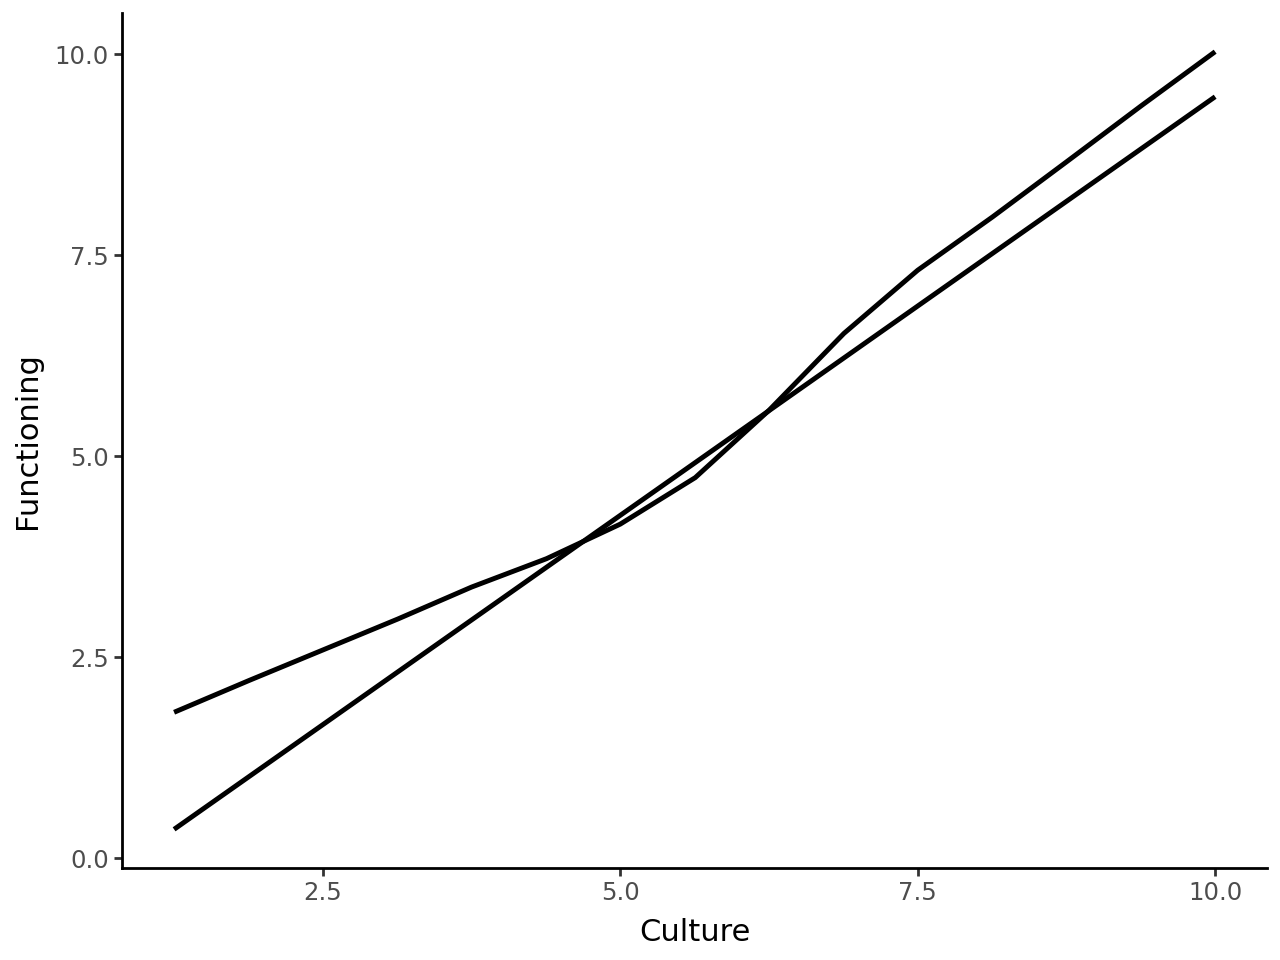

In [7]:
lines2 = dots1 + geom_smooth(se=False, colour="black")
lines2 + theme_classic()

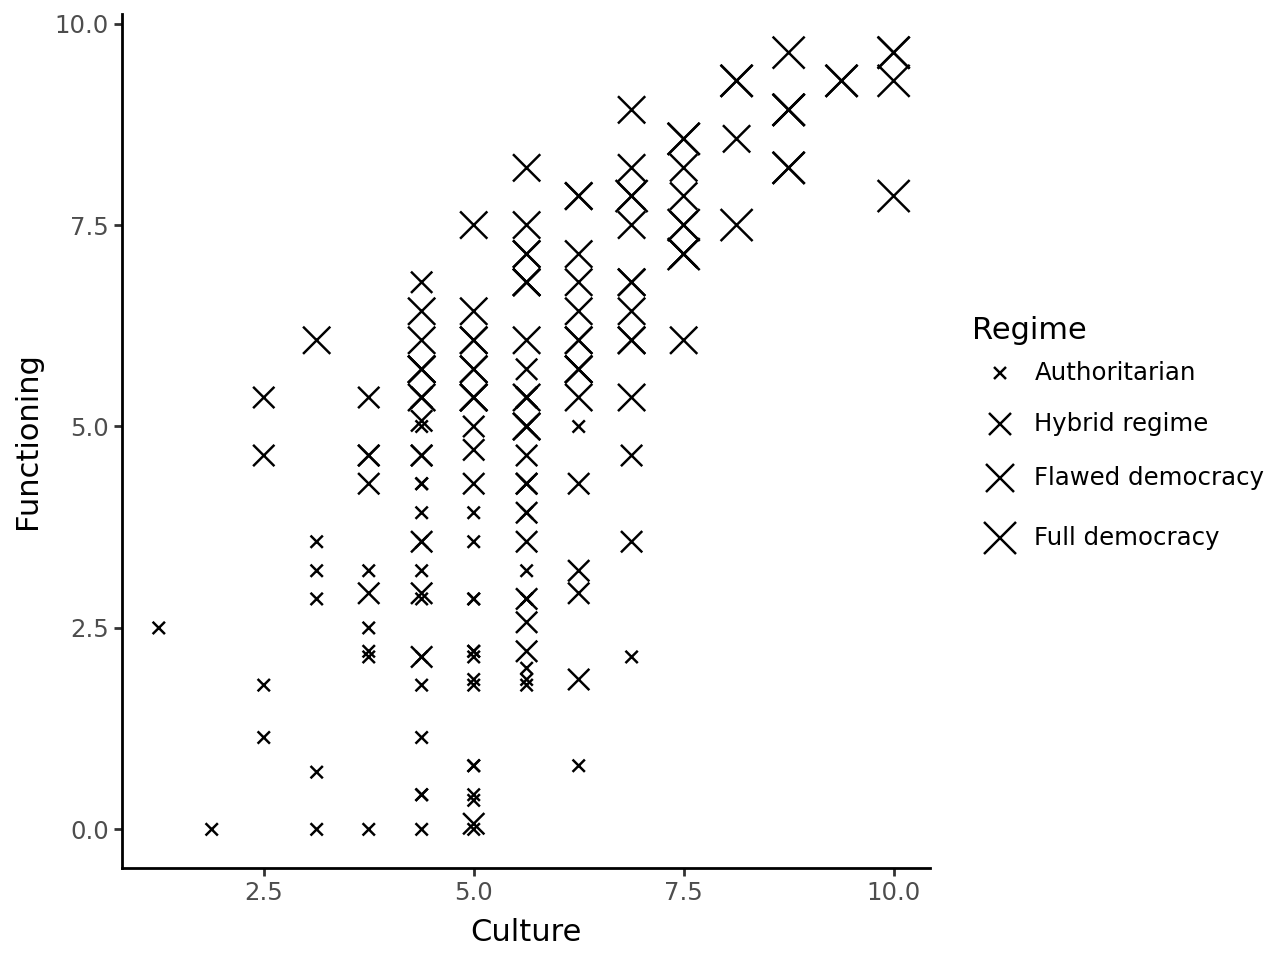

In [8]:
info = ggplot(demo, aes(x='Culture', y='Functioning', size='Regime'))
polyg1 = info + geom_point(shape="x")
polyg1 + theme_classic()

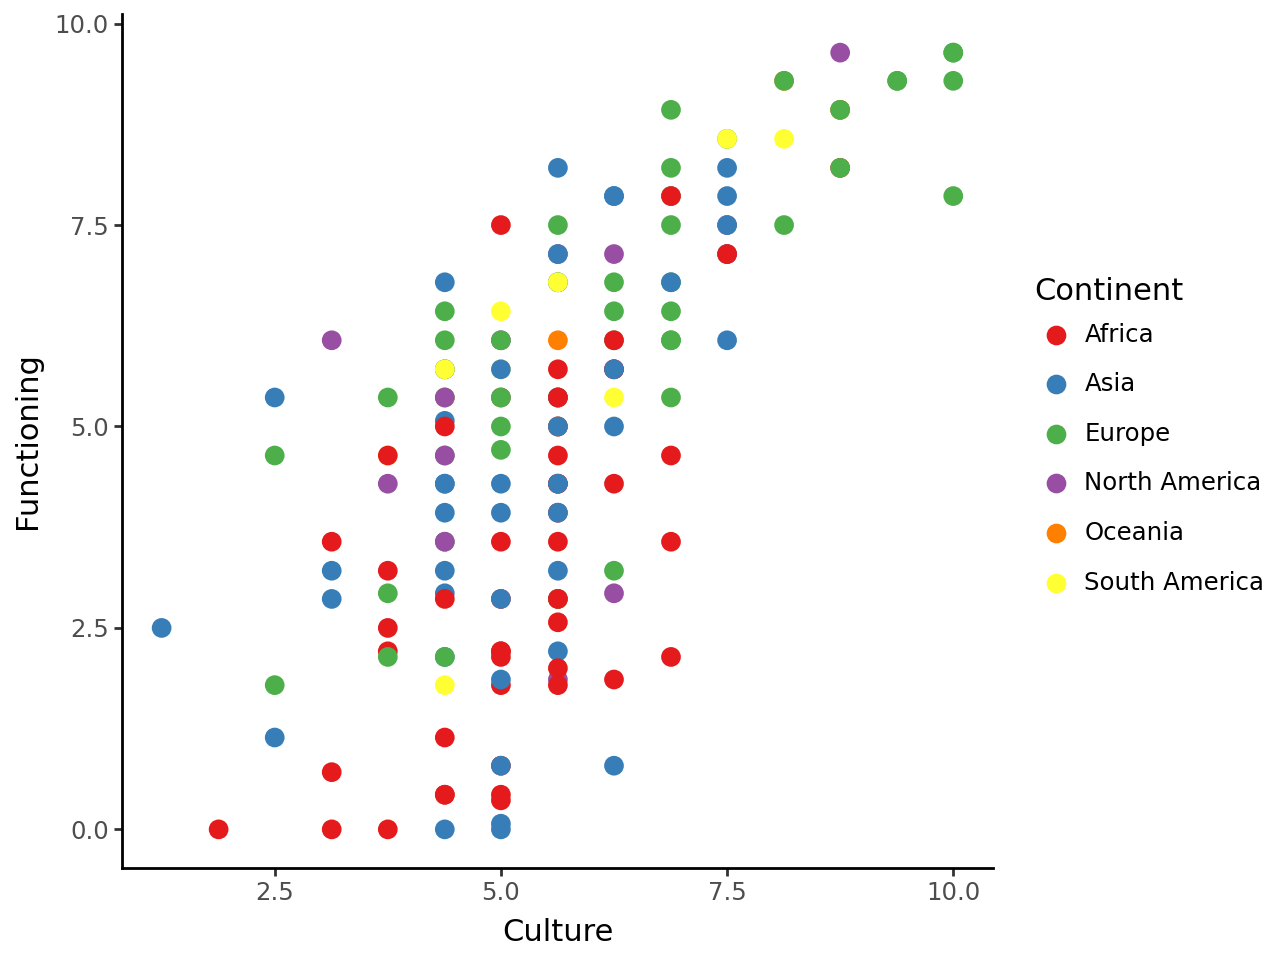

In [15]:
info=ggplot(demo,aes(x='Culture',y='Functioning',colour='Continent'))
colorNom1=info+geom_point(size=3)
colorNom1 + scale_colour_brewer(type='qual',palette = "Set1") + theme_classic()

In [ ]:
info2=ggplot(demo,aes(x='Culture',y='Functioning',fill='Regime'))
colorOrd3 = info2 + geom_point(size=3,shape='o')
colorOrd3 + scale_fill_brewer(palette = "OrRd") + theme_classic()

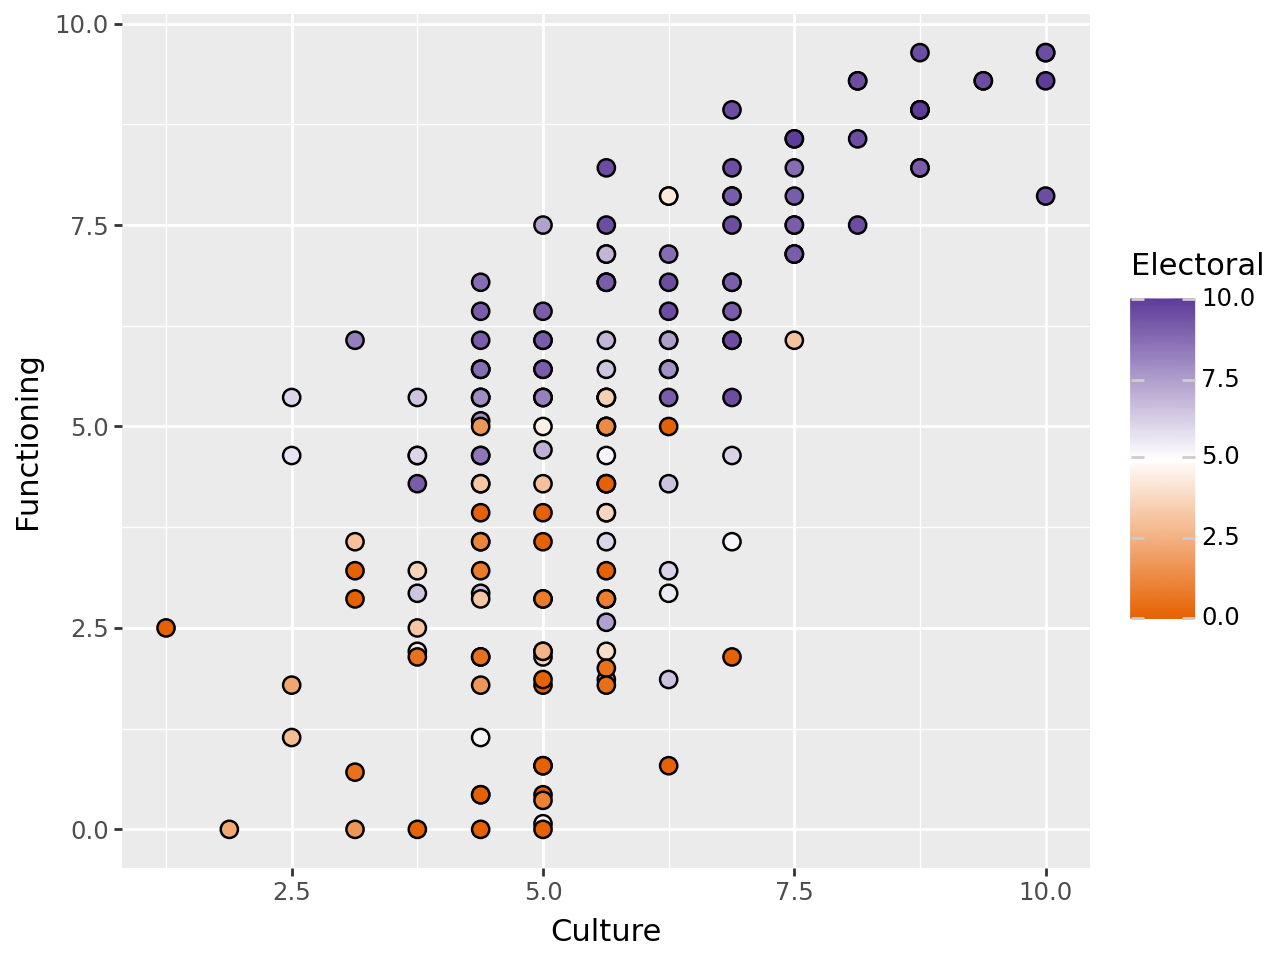

In [16]:
info4=ggplot(demo,aes(x='Culture',y='Functioning',
fill='Electoral'))
colorNum=info4 + geom_point(size=3, shape='o')
colorNum + scale_fill_gradient2(midpoint = 5, mid= 'white', low = '#e66101', high = '#5e3c99')

In [17]:
FT = pd.value_counts(demo.Continent, ascending=True).reset_index()
FT.columns = ['Values','Counts']

C:\Users\uari\AppData\Local\Temp\ipykernel_17056\3483285717.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.


In [18]:
the_Title="A NICE TITLE"
the_SubTitle="A nice subtitle"
TheTopTitles=the_Title+'\n'+the_SubTitle # adaptation
horizontalTitle="Continents present in the study"
verticalTitle="Number of countries studied"
# data for annotation
theCoordinates={'X':1,'Y':7} #dict instead of list
theMessage="So few?!"

In [28]:
titles1=info + geom_bar()
titles2 = titles1 + xlab(horizontalTitle) + ylab(verticalTitle)
annot1 = titles2 + annotate("text", x=theCoordinates['X'], y=theCoordinates['Y'], label=theMessage)
align1 = annot1 + theme(plot_title = element_text(ha="center"), axis_title_y = element_text(ha="top"))

barFT1 = align1 + geom_bar(stat='identity')
barFT2 = barFT1 + theme_classic()
barFT3 = barFT2 + theme(axis_title_x = element_blank(), axis_title_y = element_text(ha="center"),
                        axis_ticks_major_x = element_blank(),
                        axis_ticks_major_y = element_blank(),
                        axis_text_x = element_text(va='top', size=6),
                        plot_title = element_text(ha = "center"),
                        axis_line_x = element_blank())

barFT4 = barFT3 + scale_x_discrete(limits=FT.Values)

barFT4 + geom_text(aes(label='Counts'), va='top', color="white", size=8) + theme(axis_text_y = element_blank())


PlotnineError: 'stat_count() must not be used with a y aesthetic'

C:\Users\uari\Anaconda3\lib\site-packages\IPython\lib\pretty.py:700: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


PlotnineError: 'stat_count() must not be used with a y aesthetic'

In [31]:
barFT4 + theme(panel_grid_major_y=element_line(color="grey")) + scale_y_continuous(breaks=FT.Counts)

PlotnineError: 'stat_count() must not be used with a y aesthetic'

C:\Users\uari\Anaconda3\lib\site-packages\IPython\lib\pretty.py:700: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


PlotnineError: 'stat_count() must not be used with a y aesthetic'

In [32]:
info=ggplot(demo, aes(x='Culture', y='Functioning',
shape='Continent'))
leyenda=info + geom_point()
erase2=leyenda + theme_classic() + \
theme(legend_title=element_blank())
repo2=erase2 + coord_fixed(ratio=1)
repo2=repo2 + theme(legend_key_width = 0,
legend_background = element_rect(size=0.5,
linetype="solid",
colour ="grey"))
# HELP from matplotlib
import matplotlib.pyplot as plt
fig = repo2.draw()
# x=0,y=0 is lower left corner; x=1,y=1 is upper right
fig.text(x=0.7,y=0.01,s="The Caption with matplotlib")
# suptitle for TITLE
plt.suptitle(the_Title, y=0.95, fontsize=18)
# title for subTITLE
plt.title(the_SubTitle, fontsize=10)

Text(0.5, 1.0, 'A nice subtitle')